### **Descarga e importe de bibliotecas**

In [1]:
%%capture
# Instalar y actualizar bibliotecas necesarias
!pip install gdown
!pip install roboflow
!pip install ultralytics

# Importar bibliotecas a usar y deshabilitar WanDB
import os
import yaml
import gdown
import wandb
import shutil
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from roboflow import Roboflow
from ultralytics import YOLO


os.environ['WANDB_DISABLED'] = 'true'

### **Descarga y acondicionamiento de la base de datos de semillas**

In [2]:
# Descargar repositorio de aisladores
rf = Roboflow(api_key="3ioUIbqERJ2jEWElELQN")
project = rf.workspace("gcpds-tm2ae").project("seed-detection-smrzf")
version = project.version(6)
dataset = version.download("yolov11")
!mkdir datasets
!mv ./Seed-Detection-6 ./datasets

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Seed-Detection-6 in yolov11:: 100%|██████████| 6416/6416 [00:00<00:00, 8446.84it/s]


In [3]:
# Creación del directorio de las partes de la base de datos
data = {
    'path': './Seed-Detection-6',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': { 0: 'Germinada', 1:'No germinada'},
    'roboflow': {
        'license': 'CC BY 4.0',
        'project': 'seed-detection-smrzf',
        'url': 'https://universe.roboflow.com/gcpds-tm2ae/seed-detection-smrzf/dataset/6',
        'version': 6,
        'workspace': 'gcpds-tm2ae'}
}

# Especificar el directorio del archivo
file_path = './datasets/Seed-Detection-6/data.yaml'

# Escribir la información sobre el archivo YAML
with open(file_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

### **Entrenamiento del modelo YOLOv11**

In [4]:
# Entrenar YOLOv11 para detección de semillas

# Carga de modelo preentrenado
model = YOLO('yolo11m.pt')

# Entrenar el modelo
results = model.train(data='./datasets/Seed-Detection-6/data.yaml', epochs=100, imgsz=640, device=[0,1])

100%|██████████| 38.8M/38.8M [00:00<00:00, 146MB/s]
100%|██████████| 755k/755k [00:00<00:00, 27.2MB/s]
2025-03-13 05:15:32,164	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-03-13 05:15:33,597	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Ultralytics 8.3.89 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=2
Transferred 643/649 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/Seed-Detection-6/train/labels... 2658 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2658/2658 [00:02<00:00, 1054.34it/s]


train: New cache created: /kaggle/working/datasets/Seed-Detection-6/train/labels.cache


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/Seed-Detection-6/valid/labels... 97 images, 0 backgrounds, 0 corrupt:  27%|██▋       | 97/360 [00:00<00:00, 919.41it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/Seed-Detection-6/valid/labels... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<00:00, 1179.39it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


val: New cache created: /kaggle/working/datasets/Seed-Detection-6/valid/labels.cache


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.62G      1.373      1.014      1.102         24        640: 100%|██████████| 167/167 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.34it/s]


                   all        360       7512      0.722      0.711      0.726      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       5.4G      1.318     0.7708      1.087         23        640: 100%|██████████| 167/167 [00:59<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.79it/s]


                   all        360       7512      0.727      0.654      0.656      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       5.4G      1.335     0.7633      1.103         58        640: 100%|██████████| 167/167 [01:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.762      0.685      0.707      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       5.4G       1.29     0.7463      1.069         82        640: 100%|██████████| 167/167 [01:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.87it/s]


                   all        360       7512      0.762      0.735      0.761      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       5.4G      1.234     0.6784      1.056         13        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.81it/s]


                   all        360       7512      0.762       0.67      0.732      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       5.4G      1.176     0.6466      1.042         36        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.849      0.809       0.86       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       5.4G      1.164     0.6313      1.032         25        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.801      0.769      0.808      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       5.4G      1.126     0.6046      1.021         24        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.87it/s]


                   all        360       7512      0.872      0.827      0.879      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       5.4G      1.124     0.6074      1.015         22        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.866      0.856      0.886      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       5.4G      1.081     0.5653     0.9951         34        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512       0.86      0.855      0.886      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       5.4G      1.056     0.5613     0.9927         37        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]


                   all        360       7512      0.867      0.868      0.902      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       5.4G      1.054     0.5584     0.9867         39        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.885      0.857      0.901      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       5.4G       1.06     0.5522     0.9923         13        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512       0.88      0.856      0.903      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       5.4G      1.032     0.5355     0.9771         22        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.865      0.845      0.883      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       5.4G      1.038      0.536     0.9798         83        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.879      0.867      0.901      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       5.4G      1.002     0.5272     0.9727         23        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]


                   all        360       7512      0.876      0.849      0.885      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       5.4G      1.015     0.5243     0.9816         25        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.87it/s]


                   all        360       7512      0.884      0.877      0.914      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       5.4G      1.015     0.5251     0.9715         27        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.876      0.851      0.904      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       5.4G     0.9866     0.5095     0.9709          9        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.883      0.849      0.903      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       5.4G      0.988     0.5147     0.9712         34        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.902      0.869      0.918      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       5.4G     0.9814     0.5121     0.9691         19        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.874      0.877       0.91      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       5.4G     0.9705     0.4979     0.9605         20        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.872      0.862      0.909      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       5.4G     0.9761     0.4943     0.9668         26        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512       0.87      0.845      0.898      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.4G     0.9589     0.4981     0.9615          9        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]


                   all        360       7512       0.88      0.864      0.919      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       5.4G     0.9362     0.4794     0.9532         16        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.883      0.883      0.922      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       5.4G     0.9376     0.4819      0.956         22        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        360       7512      0.865       0.88      0.916      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       5.4G     0.9182     0.4745     0.9463         19        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        360       7512        0.9       0.88      0.927        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       5.4G     0.9196     0.4792     0.9479         29        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.876      0.872      0.915      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       5.4G     0.9034     0.4766     0.9412         12        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]


                   all        360       7512      0.879      0.894      0.928      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       5.4G     0.9142     0.4661     0.9474         24        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512       0.88      0.897      0.924      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       5.4G     0.9141      0.468      0.944         41        640: 100%|██████████| 167/167 [01:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.888      0.894      0.929      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       5.4G     0.9115     0.4732     0.9465         14        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.87it/s]


                   all        360       7512        0.9      0.879      0.929      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       5.4G     0.9016     0.4696     0.9502          9        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.87it/s]


                   all        360       7512      0.881        0.9      0.931      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       5.4G     0.8971     0.4626     0.9411         81        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.888      0.901      0.933       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       5.4G     0.8935     0.4597     0.9427         20        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.897      0.894      0.931      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       5.4G     0.8902     0.4597     0.9337         16        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        360       7512      0.884      0.911      0.933      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       5.4G     0.8792     0.4507     0.9486         10        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.893      0.897      0.933      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       5.4G     0.8808     0.4565     0.9343         33        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.902      0.877      0.933      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       5.4G     0.8588     0.4387     0.9318         25        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.892      0.895      0.935       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       5.4G     0.8538     0.4502     0.9332         74        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        360       7512      0.899      0.896      0.936      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       5.4G     0.8658     0.4482     0.9381         17        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        360       7512      0.902      0.888      0.937      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       5.4G     0.8778     0.4541      0.947         28        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.895      0.898      0.937      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       5.4G     0.8595     0.4452     0.9332         26        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512       0.89      0.895      0.931      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       5.4G     0.8398     0.4427     0.9232         26        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.904      0.892      0.936       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       5.4G     0.8398     0.4284     0.9289         25        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.889      0.896       0.93      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       5.4G     0.8495     0.4362     0.9324         30        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.909      0.884      0.937      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       5.4G     0.8483     0.4382     0.9252         27        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.913      0.878       0.94      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       5.4G     0.8413     0.4298     0.9224         51        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.904       0.89      0.938      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       5.4G     0.8368     0.4241      0.918         52        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.912      0.881      0.936      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       5.4G     0.8301     0.4212       0.92         12        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512        0.9      0.892      0.937      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       5.4G     0.8219     0.4232     0.9218         39        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        360       7512      0.907      0.892      0.941      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       5.4G     0.8354     0.4317      0.925         52        640: 100%|██████████| 167/167 [01:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.898      0.902      0.941       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       5.4G     0.8167     0.4238     0.9214         18        640: 100%|██████████| 167/167 [01:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]


                   all        360       7512      0.893      0.893      0.936      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       5.4G     0.8227     0.4135     0.9194         15        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.904      0.901      0.941       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       5.4G     0.8014     0.4183     0.9212         11        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512       0.91      0.885       0.94      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       5.4G     0.8185     0.4238     0.9252         33        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.897      0.887      0.939      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       5.4G      0.815     0.4131     0.9208         14        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.908      0.885      0.937      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       5.4G     0.8096      0.415     0.9203         25        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.94it/s]


                   all        360       7512      0.897      0.891      0.938      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       5.4G     0.7927     0.4049     0.9125         51        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.903      0.883       0.94      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       5.4G     0.7954      0.407     0.9159         60        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.914       0.88      0.937      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       5.4G     0.8066     0.4112     0.9184         13        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]


                   all        360       7512      0.899      0.897      0.938      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       5.4G     0.7986     0.4059     0.9097         80        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]


                   all        360       7512      0.914      0.885      0.939      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       5.4G      0.787     0.4036     0.9079         14        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.87it/s]


                   all        360       7512      0.915      0.884      0.942      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       5.4G      0.778     0.4003     0.9113         49        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.886      0.894      0.934      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       5.4G     0.7856      0.403      0.912         12        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.893      0.898      0.941      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       5.4G     0.7987     0.4019      0.914         71        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.909      0.888      0.943      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       5.4G     0.7884      0.399     0.9108         17        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.886      0.905      0.939      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       5.4G     0.7765     0.3965     0.9082         22        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.892        0.9      0.941      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       5.4G     0.7814     0.3975     0.9073         15        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.888      0.912      0.942      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       5.4G     0.7647      0.391     0.9049         73        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]


                   all        360       7512      0.895      0.907      0.944      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       5.4G     0.7658     0.3903     0.9053         54        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.85it/s]


                   all        360       7512      0.893      0.908      0.943      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       5.4G     0.7647     0.3935     0.9015         15        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.881      0.904      0.936      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       5.4G     0.7698      0.389     0.9092         26        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.885      0.907      0.941      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       5.4G     0.7598     0.3892     0.9081         56        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.93it/s]


                   all        360       7512      0.901       0.89      0.939      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       5.4G     0.7666     0.3858     0.9022         31        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.882      0.913      0.943      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       5.4G     0.7528     0.3868     0.8977         58        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.892      0.898      0.941      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       5.4G     0.7572     0.3837      0.905         10        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512       0.91      0.882       0.94      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       5.4G     0.7486     0.3795     0.9006         21        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.895        0.9      0.942      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       5.4G     0.7515      0.381     0.9025         27        640: 100%|██████████| 167/167 [01:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.895      0.903      0.944      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       5.4G     0.7368     0.3721     0.8955         40        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.94it/s]


                   all        360       7512      0.906      0.894      0.944      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       5.4G      0.744     0.3822     0.8996         23        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.901      0.889      0.942      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       5.4G     0.7446     0.3727     0.8992         19        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.93it/s]


                   all        360       7512      0.907      0.894      0.944      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       5.4G     0.7475     0.3764     0.9007         14        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.93it/s]


                   all        360       7512      0.898      0.908      0.944      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       5.4G     0.7385     0.3699     0.9046          9        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512        0.9      0.901      0.944      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       5.4G     0.7418     0.3702     0.8971         12        640: 100%|██████████| 167/167 [01:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        360       7512      0.919      0.884      0.944      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       5.4G     0.7272     0.3661     0.8988         12        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.909      0.893      0.945       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       5.4G     0.7364     0.3809     0.9005         24        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.892       0.91      0.945      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       5.4G     0.7095      0.355     0.8908         17        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.901      0.902      0.945      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       5.4G     0.7176     0.3681     0.8916         10        640: 100%|██████████| 167/167 [01:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        360       7512      0.886      0.912      0.945      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       5.4G     0.7271     0.3652     0.8947         16        640: 100%|██████████| 167/167 [01:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.93it/s]


                   all        360       7512      0.901      0.906      0.945      0.752
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       5.4G     0.7595     0.3574     0.9323         11        640: 100%|██████████| 167/167 [01:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


                   all        360       7512      0.897      0.899      0.945      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       5.4G     0.7356     0.3452     0.9172         11        640: 100%|██████████| 167/167 [01:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        360       7512      0.901        0.9      0.944      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       5.4G     0.7314     0.3403     0.9155         25        640: 100%|██████████| 167/167 [01:00<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.93it/s]


                   all        360       7512      0.905      0.896      0.945      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       5.4G     0.7159     0.3408     0.9121          7        640: 100%|██████████| 167/167 [01:00<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512        0.9      0.898      0.945      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       5.4G     0.7057     0.3315     0.9065         21        640: 100%|██████████| 167/167 [01:00<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]


                   all        360       7512      0.898      0.902      0.946      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       5.4G     0.7029     0.3291     0.8996         26        640: 100%|██████████| 167/167 [01:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        360       7512      0.891      0.903      0.946      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       5.4G     0.7089     0.3338     0.9089         26        640: 100%|██████████| 167/167 [01:00<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.94it/s]


                   all        360       7512      0.901      0.897      0.947      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       5.4G     0.6969     0.3308     0.9019         25        640: 100%|██████████| 167/167 [01:00<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        360       7512        0.9      0.904      0.947      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       5.4G     0.6885     0.3293     0.8947         25        640: 100%|██████████| 167/167 [01:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]


                   all        360       7512      0.899      0.904      0.947      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       5.4G     0.6819     0.3215     0.8962         25        640: 100%|██████████| 167/167 [01:00<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        360       7512      0.901      0.903      0.947      0.755

100 epochs completed in 1.891 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.89 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.76it/s]


                   all        360       7512      0.901      0.903      0.947      0.755
             Germinada        210       1032      0.845      0.824      0.904      0.657
          No germinada        360       6480      0.957      0.982       0.99      0.853
Speed: 0.2ms preprocess, 12.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


### **Rendimiento del modelo sobre datos de validación**

val: Scanning /kaggle/working/datasets/Seed-Detection-6/valid/labels.cache... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.56it/s]


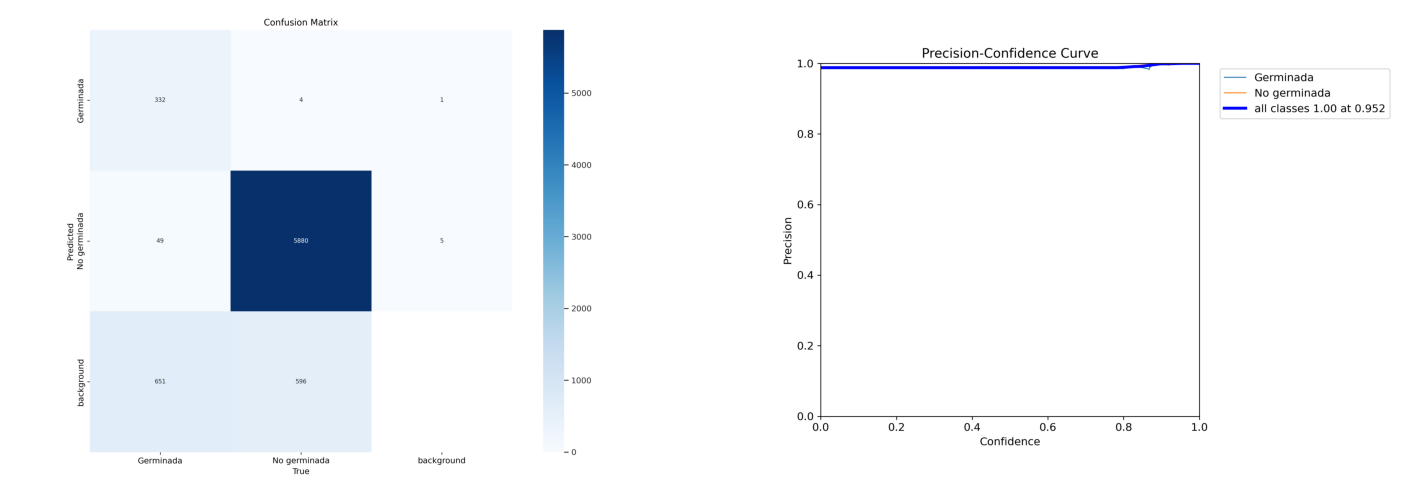

In [5]:
# Validar el modelo entrenado

# Carga de modelo entrenado
model = YOLO('./runs/detect/train/weights/best.pt') 

# Realizar validación
validation_results = model.val(data='./datasets/Seed-Detection-6/data.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.8,
                               iou=0.6,
                               device='0')

# Cargar la imagen
image = mpimg.imread("./runs/detect/val/confusion_matrix.png")
image_1 = mpimg.imread("./runs/detect/val/P_curve.png")

# Mostrar la matriz de confusión imagen
fig, axis = plt.subplots(1,2,figsize=(18,8))
axis[0].imshow(image)
axis[0].axis('off')
axis[1].imshow(image_1)
axis[1].axis('off')
plt.show()